![](https://www.science.unsw.edu.au/sites/default/files/styles/teaser_mobile/public/images/SCIF2199_science.jpeg?h=f4cc0ec0&itok=Q5grmW2p)
# Introduction
This week, we are looking into the campus recruitment dataset. 

First off, what exactly is a job placement? 

![](https://www.dotmagazine.online/_Resources/Persistent/5dc7a08f74a692ec2b2e5a6edd476d915efa5b60/iStock-939787916%20copy-720x405.jpg)


A job placement is very similar to an internship, just much longer. Doing placement as part of the course provides huge benefit by providing great working experience and increase your employability when you are ready to enter the market. No, you won't be just making coffee although you will be responsible for quite a fair amount of general administrative duties. Since you are considered an employee in the company. you will have the opportunity to develop your skills through meatier assignments. After you have completed your job placement, you may be given the opportunity to join the company if you exceed their expectations! 

For this dataset, we have created the following objectives to answer common questions frequently asked.

## Objectives
1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?
4. Play with the data conducting all statistical tests.

### Importing required packages

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [44]:
# Creating a function to print 
def overview():
    data =pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
    print("First 5 lines of data:\n")
    print(data.head())
    print("\n\n\n")
    print("There are {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\n")
    print("Data types:\n")
    print(data.dtypes)
    print("\n\n\n")
    print("% of missing values per column:\n")
    print(data.isnull().mean().round(2)*100)
    print("Statistical summary:\n")
    print(data.describe())
    return data
    
data = overview()

First 5 lines of data:

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  




There are 215 rows and 15 columns




Data types:

sl_no               int64
gender            

### Dealing with NaN values 
- Since we have 31/215 NaN values, it's not practical to remove them since they can affect the overall integrity of the data. We will use SimpleImputer to replace those NaN with median values. 

In [45]:
data = data.fillna(0)

data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Can gender affects salary?

Text(0.5, 1.0, 'Barplot showing salary by gender')

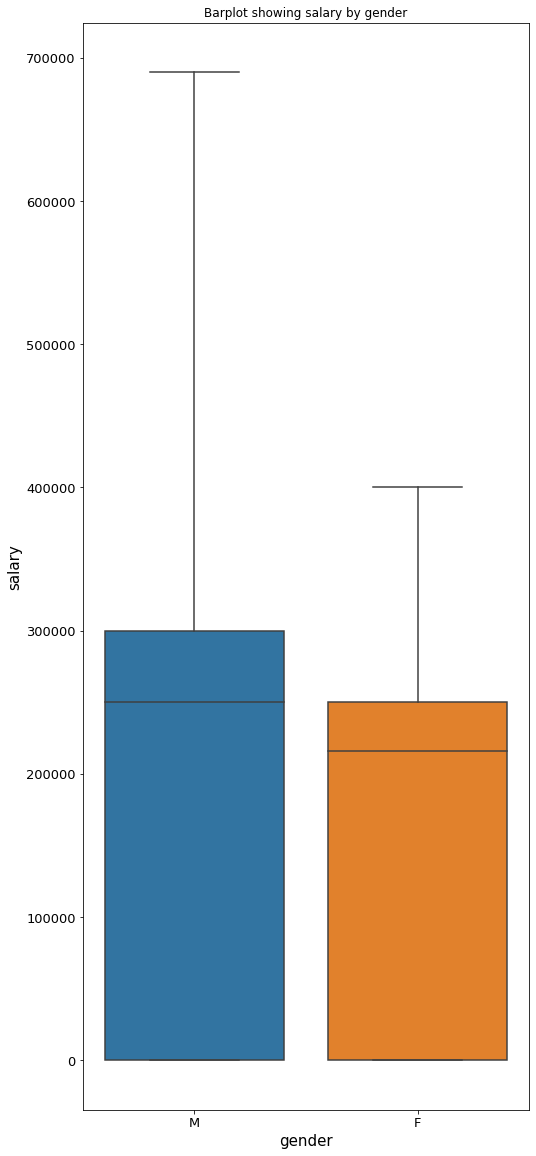

In [46]:
plt.figure(figsize = (8, 20))

sns.boxplot(data = data, x = 'gender', y = 'salary',showfliers = False).set_title("Barplot showing salary by gender") #outlier not shown here

- Finding median for female since we can't see clearly.

In [47]:
data[data['gender'] == 'F'].salary.median()


216000.0

- It seems like the median between males and females are very close. The distribution of salary seems to be wider for males. 

## Does academic results affect salary obtained?
- Do note that these data will only include students that got the job placement.

Text(0.5, 1.0, 'Regression plot: Secondary Education percentage- 10th Grade vs Salary')

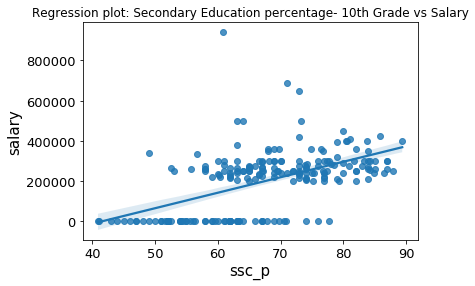

In [48]:
# Secondary Education percentage- 10th Grade vs Salary

sns.regplot(data = data, x ='ssc_p', y = 'salary' ).set_title("Regression plot: Secondary Education percentage- 10th Grade vs Salary")

Text(0.5, 1.0, 'Regression plot: Higher Secondary Education percentage- 12th Grade vs Salary')

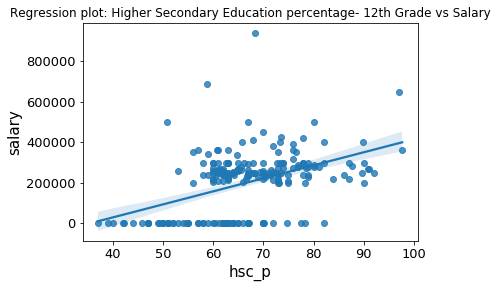

In [49]:
# Higher Secondary Education percentage- 12th Grade vs Salary

sns.regplot(data = data, x ='hsc_p', y = 'salary' ).set_title("Regression plot: Higher Secondary Education percentage- 12th Grade vs Salary")

Text(0.5, 1.0, 'Regression plot: Degree percentage vs Salary')

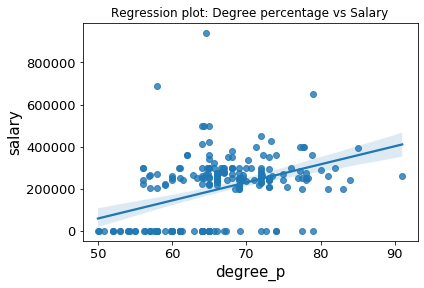

In [50]:
# Degree percentage vs Salary

sns.regplot(data = data, x ='degree_p', y = 'salary' ).set_title("Regression plot: Degree percentage vs Salary")

Text(0.5, 1.0, 'Regression plot: Employability test percentage vs salary')

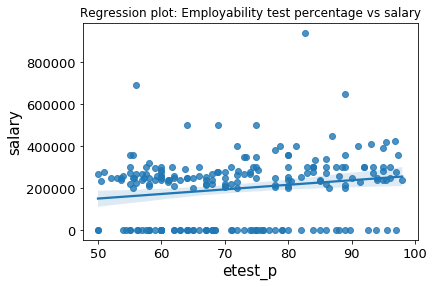

In [51]:
# Employability test percentage vs salary

sns.regplot(data = data, x ='etest_p', y = 'salary' ).set_title("Regression plot: Employability test percentage vs salary")

Text(0.5, 1.0, 'Regression plot: MBA test percentage vs salary ')

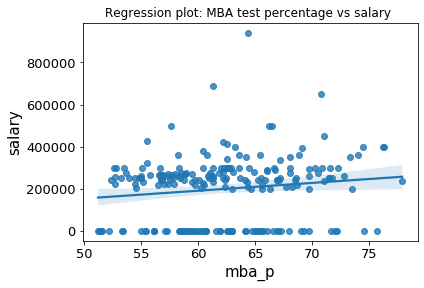

In [52]:
# MBA test percentage vs salary

sns.regplot(data = data, x ='mba_p', y = 'salary').set_title("Regression plot: MBA test percentage vs salary ")

- We can clearly see that there is no strong correlation between academic scores and salary.

## Can type of specialisation affect placement?

Text(0.5, 1.0, 'Barplot showing placement between gender')

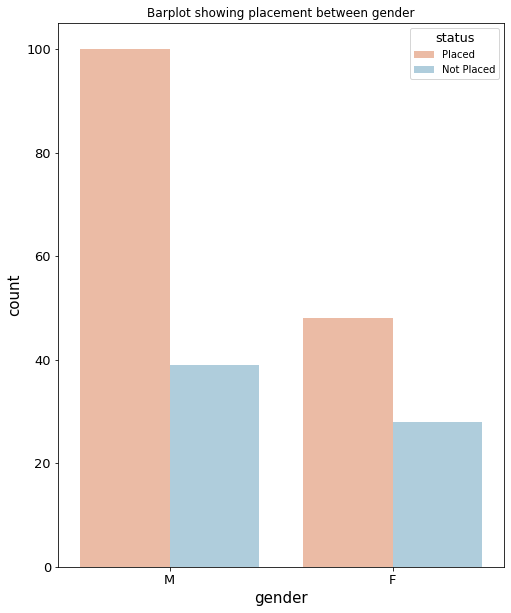

In [53]:
# Look at placement between gender
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = data, x = 'gender', hue = 'status', palette = "RdBu").set_title("Barplot showing placement between gender")

It seems like more males are able to obtain the job placement. 

Text(0.5, 1.0, 'Barplot showing placement among specialisation')

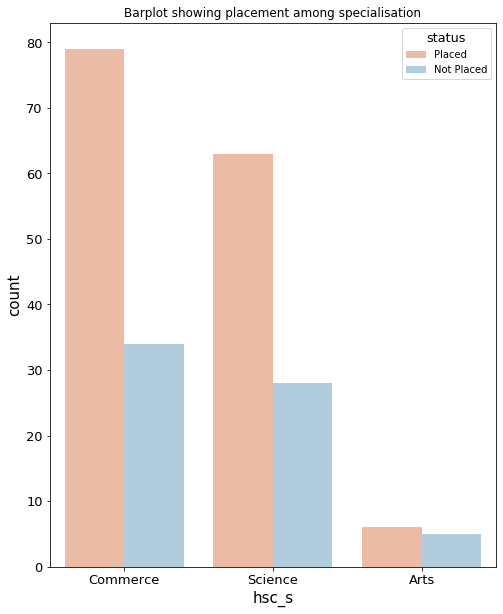

In [54]:
# Look at placement among specialization in higher secondary education
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = data, x = 'hsc_s', hue = 'status', palette = "RdBu").set_title("Barplot showing placement among specialisation")

Text(0.5, 1.0, 'Barplot showing placement among specialisation (degree)')

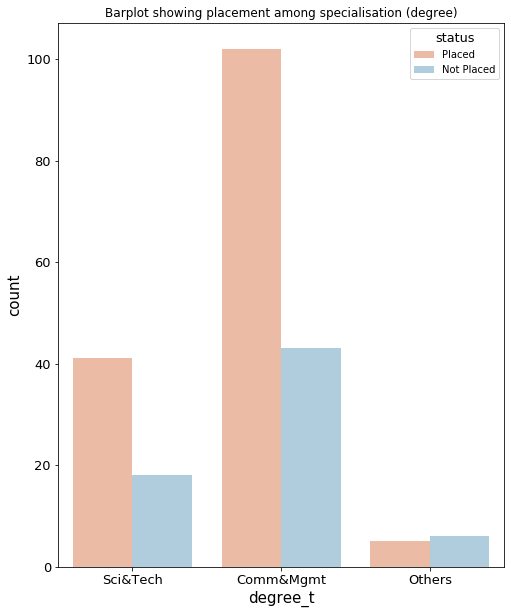

In [55]:
# Look at placement among degree specialization 
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = data, x = 'degree_t', hue = 'status', palette = "RdBu").set_title("Barplot showing placement among specialisation (degree)")

Text(0.5, 1.0, 'Barplot showing placement among specialisation (masters)')

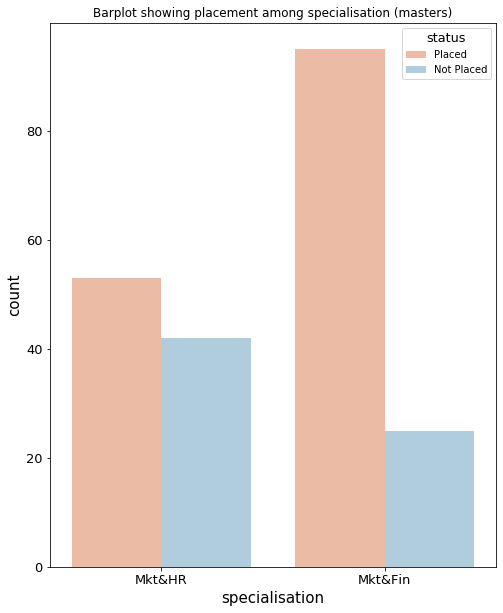

In [56]:
# Look at placement among master specialization 
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = data, x = 'specialisation', hue = 'status', palette = "RdBu").set_title("Barplot showing placement among specialisation (masters)")

- From what we see here, it seems like business related specialisation tend to have a higher chance of getting a job placement.

## Will work experience affect placement

Text(0.5, 1.0, 'Barplot showing placement among different work experience')

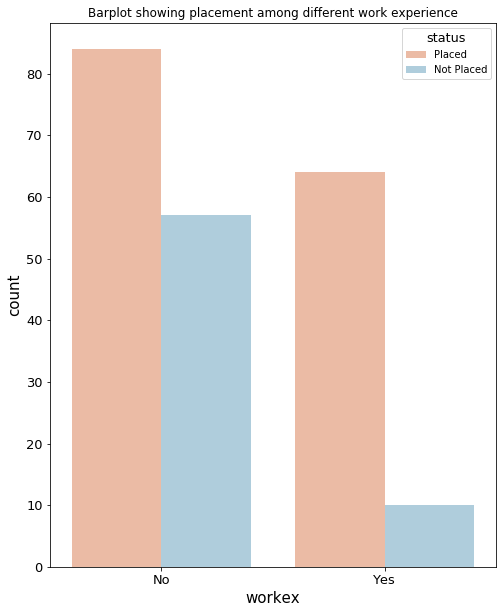

In [57]:
# Look at placement among work experience
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = data, x = 'workex', hue = 'status', palette = "RdBu").set_title("Barplot showing placement among different work experience")

- It seems like work experience has no effect on job placement.

## Using logistic regression to predict the chance of getting a job placement

In [58]:
# Use label encoder to change categorical data to numerical
le = LabelEncoder()
 
# Implementing LE on gender
le.fit(data.gender.drop_duplicates()) 
data.gender = le.transform(data.gender)

# Implementing LE on ssc_b
le.fit(data.ssc_b.drop_duplicates()) 
data.ssc_b = le.transform(data.ssc_b)

# Implementing LE on hsc_b
le.fit(data.hsc_b.drop_duplicates()) 
data.hsc_b = le.transform(data.hsc_b)

# Implementing LE on hsc_s
le.fit(data.hsc_s.drop_duplicates()) 
data.hsc_s = le.transform(data.hsc_s)

# Implementing LE on degree_t
le.fit(data.degree_t.drop_duplicates()) 
data.degree_t = le.transform(data.degree_t)

# Implementing LE on workex
le.fit(data.workex.drop_duplicates()) 
data.workex = le.transform(data.workex)

# Implementing LE on specialisation
le.fit(data.specialisation.drop_duplicates()) 
data.specialisation = le.transform(data.specialisation)

# Implementing LE on status
le.fit(data.status.drop_duplicates()) 
data.status = le.transform(data.status)

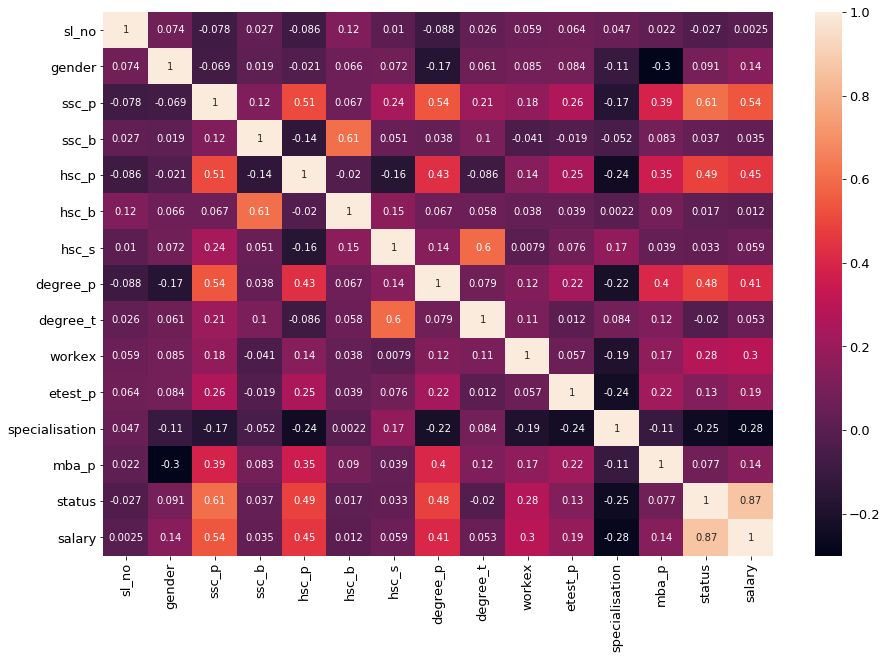

In [59]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Creating test split
- I will exclude salary from X since people that got the job placement will get a salary. 

In [60]:
# Assigning X and y
X = data.drop(['status', 'sl_no', 'salary'], axis=1)
 
y = data['status']
 
# Implementing train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Looking into the shape of training and test dataset
print(X_train.shape)
print(X_test.shape)

(172, 12)
(43, 12)


In [61]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# Fitting the model
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9070


- Great accuracy! 